# <span style="color:red">QPM: Assignment 4</span>

###  LAFTIT Mehdi, LIN Christine, MUSEUX Célia and YANG Hexuan 

Financial Engineering - Quantitative Portfolio Management

**Due date :** 13/11/2023 9am

**Ressource:** Tidy finance website / Danny Groves

> *We noticed that we used daily log returns in the Assignment 3 instead of using monthly log returns. Therefore we corrected it in the Question 0 for this assignment.*

## <span style="color:green">Preliminary step</span>

We import the libraries we are going to use in this assignment:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats as stats

C:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style="color:green">Question 0 of Assignment 4</span>

Let us download the cleaned data of S&P500 prices from Assignment 3, select the 10 companies and compute their monthly log-returns.

In [2]:
new_SP500_prices = pd.read_csv("C:/Users/Administrator/Desktop/QPM/New_SP500_prices.csv")

We select the 10 companies "MMM", "AOS", "ABT", "ADM", "ADBE", "ADP", "AES", "AFL", "A", "AKAM" to compute the monthly returns.

In [3]:
selected_symbols = ["MMM", "AOS", "ABT", "ADM", "ADBE", "ADP", "AES", "AFL", "A", "AKAM"]

# We select only the rows where the 10 ticker names appear
prices_10_companies = new_SP500_prices[new_SP500_prices['symbol'].isin(selected_symbols)]

We now compute the monthly log-returns using the following formula:  $ln(Pt/P(t-1))$ where $ln$ is the natural logarithm function and $Pt$ is the adjusted prices at time t.

In [4]:
prices_10_companies['date'] = pd.to_datetime(prices_10_companies['date'])
prices_10_companies.set_index('date', inplace=True)


log_return_matrix = (prices_10_companies
    .pivot(columns="symbol", values="adjusted")
    .resample("M")
    .last()
    .apply(lambda x: np.log(x / x.shift(1)))
    .dropna()
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7004\3195829008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_10_companies['date'] = pd.to_datetime(prices_10_companies['date'])


In [6]:
log_return_matrix

symbol,A,ABT,ADBE,ADM,ADP,AES,AFL,AKAM,AOS,MMM
date,,,,,,,,,,
2000-02-29,0.450696,0.013346,0.616504,-0.150862,-0.085217,0.044995,-0.170378,0.047523,-0.135341,-0.053376
2000-03-31,0.001203,0.064184,0.087614,0.024541,0.104225,-0.062304,0.220062,-0.485239,0.042560,0.004243
2000-04-30,-0.159977,0.093346,0.082932,-0.037042,0.109110,0.132837,0.068901,-0.486383,0.139391,-0.022120
2000-05-31,-0.185430,0.056888,-0.071765,0.188230,0.021827,-0.030337,0.058973,-0.392902,0.021053,-0.003692
2000-06-30,0.001696,0.090972,0.144227,-0.196028,-0.024957,0.044825,-0.117934,0.575935,-0.003727,-0.032595
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.044605,-0.058554,-0.093692,0.064675,0.013553,0.135723,0.042781,-0.063721,-0.114056,-0.131211
2022-09-30,-0.053656,-0.059091,-0.305259,-0.088450,-0.073160,-0.118766,-0.055714,-0.116897,-0.150143,-0.118085
2022-10-31,0.131190,0.026987,0.146124,0.186869,0.066322,0.152271,0.147161,0.095061,0.125910,0.129598


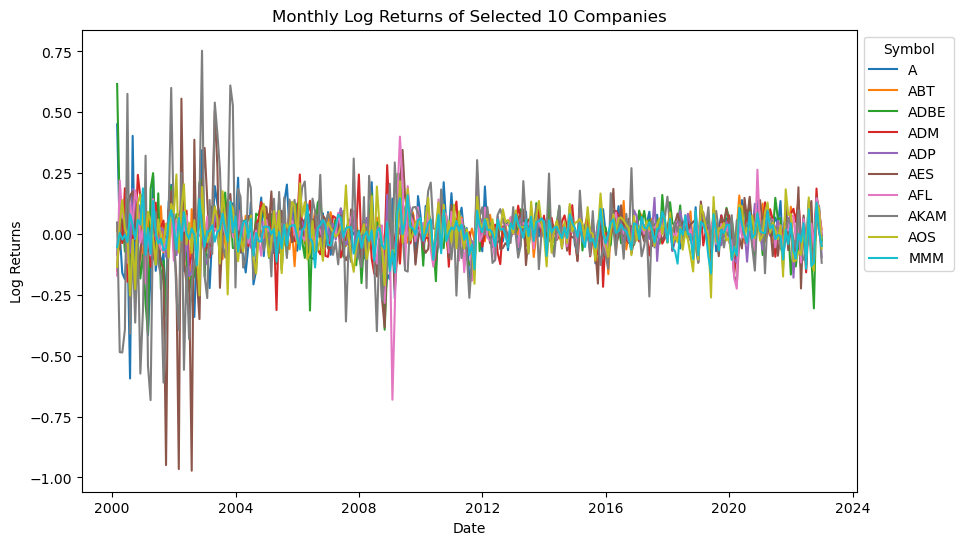

In [7]:
plt.figure(figsize=(10, 6))

for symbol in log_return_matrix.columns:
    plt.plot(log_return_matrix.index, log_return_matrix[symbol], label=symbol)

plt.title('Monthly Log Returns of Selected 10 Companies')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend(title='Symbol', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

So, we have a “new” dataset named `log_return_matrix` that we are going to use in this assignment, which consists of monthly returns for these 10 companies.


Let us assume that the risk-free rate of return is 0. 

## <span style="color:green">Question 1 of Assignment 4</span>

In this assignment our universe selection is: 10 US publicly traded stocks (A, ABT, ADBE, ADM, ADP, AES, AFL, AOS, AKAM and MMM)


We set the estimation window to be T<sup>est</sup> = 60 months of monthly returns, and we will use this estimation sample to compute the 2 following portfolio strategies (mean-variance portfolio MVP and global minimum variance portfolio GMV)

We assume that there is no constraints on the size of the weight.

In [8]:
# We choose the estimation window T_est = 60 months
T_est = 60

In [9]:
# We set our estimation window
estimation_sample = log_return_matrix.iloc[:T_est, :]

print(estimation_sample.shape)
estimation_sample.head(10)

(60, 10)


symbol,A,ABT,ADBE,ADM,ADP,AES,AFL,AKAM,AOS,MMM
date,,,,,,,,,,
2000-02-29,0.450696,0.013346,0.616504,-0.150862,-0.085217,0.044995,-0.170378,0.047523,-0.135341,-0.053376
2000-03-31,0.001203,0.064184,0.087614,0.024541,0.104225,-0.062304,0.220062,-0.485239,0.042560,0.004243
2000-04-30,-0.159977,0.093346,0.082932,-0.037042,0.109110,0.132837,0.068901,-0.486383,0.139391,-0.022120
2000-05-31,-0.185430,0.056888,-0.071765,0.188230,0.021827,-0.030337,0.058973,-0.392902,0.021053,-0.003692
2000-06-30,0.001696,0.090972,0.144227,-0.196028,-0.024957,0.044825,-0.117934,0.575935,-0.003727,-0.032595
2000-07-31,-0.593225,-0.066771,-0.126960,-0.045610,-0.077615,0.158057,0.122759,-0.409223,-0.252484,0.081663
2000-08-31,0.403418,0.053155,0.126960,-0.006205,0.185103,0.174739,0.040679,-0.042706,-0.023531,0.038304
2000-09-30,-0.220330,0.083196,0.177671,-0.023278,0.115892,0.073810,0.179328,-0.363849,-0.226124,-0.020535
2000-10-31,-0.055132,0.108583,-0.020334,0.243231,-0.023642,-0.192821,0.122714,-0.029285,0.126862,0.058605


For the rest of question, we use `estimation_sample`.

In [10]:
# We compute the mu and sigma that we will be used in the calculation of the weights
mu_est = np.array(estimation_sample.mean()).T
sigma_est = np.array(estimation_sample.cov())

In [11]:
print("\033[1mThe means returns:\033[0m ")
mu_est

The means returns: 


array([-0.01827436,  0.00825793,  0.01221462,  0.01510589, -0.00059301,
       -0.01746364,  0.01063955, -0.04908904,  0.00729581,  0.01154019])

In [12]:
print("\033[1mThe variance-covariance matrix:\033[0m ")
sigma_est

The variance-covariance matrix: 


array([[ 0.03462868,  0.00055601,  0.01806097,  0.00147341,  0.0052759 ,
         0.01186457, -0.00176227,  0.03284669,  0.00493889,  0.00140742],
       [ 0.00055601,  0.00502265,  0.00163704,  0.0010124 ,  0.00141969,
        -0.00103081,  0.00065333,  0.00317176,  0.00023113,  0.00015321],
       [ 0.01806097,  0.00163704,  0.02652392, -0.00233262,  0.0036153 ,
         0.01149389,  0.00117157,  0.01704807, -0.00058413,  0.00130298],
       [ 0.00147341,  0.0010124 , -0.00233262,  0.00733993,  0.00264393,
         0.00232078,  0.00180469,  0.0016773 ,  0.00114388,  0.00174885],
       [ 0.0052759 ,  0.00141969,  0.0036153 ,  0.00264393,  0.00612613,
         0.00677604,  0.00153653,  0.00673077,  0.0003021 ,  0.00108772],
       [ 0.01186457, -0.00103081,  0.01149389,  0.00232078,  0.00677604,
         0.07464928,  0.00309578,  0.03215401,  0.00515138, -0.00026707],
       [-0.00176227,  0.00065333,  0.00117157,  0.00180469,  0.00153653,
         0.00309578,  0.00615542, -0.00204203

### 1.a Mean-variance portfolio (MVP) without constraints on the size of the weight

In [13]:
N = mu_est.shape[0]
print("\033[1mN =\033[0m ", N)
ones = np.ones(N) #vector of 1
sigma_inv = np.linalg.inv(sigma_est) #inverse of the variance-covariance matrix

N =  10


We compute the intermediate quantities:

In [14]:
a1 = mu_est.T @ sigma_inv @ mu_est # The ".T" is the transpose operator
a2 = mu_est.T @ sigma_inv @ ones # The "@" stands for matrix multiplication
a3 = ones.T @ sigma_inv @ ones
D = a1*a3 - a2**2

print("\033[1ma1=\033[0m ",a1) 
print("\033[1ma2 =\033[0m ", a2)
print("\033[1ma3 =\033[0m ", a3)
print("\033[1mD =\033[0m ", D)

a1=  0.15110985745747796
a2 =  5.481090173802507
a3 =  570.8358382499423
D =  56.216572656214325


We arbitrarily choose the target expected return, which depends mainly on investment objectives, time horizon and risk aversion.

Here we choose to set it equal to 2%

In [15]:
mu_targ=0.02

We compute the optimal weights: 

In [16]:
# We define w0 and w1
w0 = (a1*sigma_inv@ones - a2*sigma_inv@mu_est)/D
w1 = (a1*sigma_inv@ones - a2*sigma_inv@mu_est)/D + (a3*sigma_inv@mu_est - a2*sigma_inv@ones)/D


# We define function of mu_targ for weights and portfolio volatility
weights = w0 + mu_targ*(w1 - w0)
portfolioVolatility = np.sqrt(weights.T @ sigma_est @ weights)


print("\033[1mOptimal weights are:\033[0m")
print(weights)
print(" ")
print("\033[1mVolatilitiy of optimal portfolio’s return is:\033[0m",portfolioVolatility.round(4))

Optimal weights are:
[-0.14116674  0.23606917  0.22041413  0.32284968 -0.09961979 -0.0132412
 -0.00725493 -0.04578299  0.15292808  0.37480458]
 
Volatilitiy of optimal portfolio’s return is: 0.0534


**Interpretation**: here the strategy is to *short* five stocks and *long* five stocks.

So if we want a return of 2%, we will need to take a risk of 5.3%.

### 1.b Global minimum variance (GMV) portfolio without constraints on the size of the weight

In [17]:
N = mu_est.shape[0]
print("\033[1mN =\033[0m ", N)
ones = np.ones(N) #vector of 1
sigma_inv = np.linalg.inv(sigma_est) #inverse of the variance-covariance matrix

N =  10


We compute the weights of the MPV:

In [18]:
gmv_weights = sigma_inv @ ones
gmv_weights /= gmv_weights.sum()

We compute the return and volatility of the MPV:

In [19]:
gmv_return = (mu_est.T @ gmv_weights)
gmv_volatility = np.sqrt(gmv_weights.T @ sigma_est @ gmv_weights)

gmv_moments = pd.DataFrame([gmv_return, gmv_volatility], 
                           index=["average_ret", "volatility"]).T

In [20]:
print("\033[1mThe GMV weights are:\033[0m")
gmv_weights

The GMV weights are:


array([ 0.00159689,  0.28605996,  0.024503  ,  0.05002986,  0.09727619,
        0.0090046 ,  0.0920625 , -0.01363166,  0.10574657,  0.3473521 ])

**Interpretation**: here, we have to *short* the stock named AKAM and *buy* the others (A, ABT, ADBE, ADM, ADP, AES, AFL, AOS and MMM)

In [21]:
print("\033[1mThe GMV moments:\033[0m")
gmv_moments

The GMV moments:


,average_ret,volatility
0,0.009602,0.041855


**Interpretation**: with this portfolio, using these weights, we can expect a return of 1% with a volatility of 4.2% (so low return and low volatility)

## <span style="color:green">Question 2 of Assignment 4</span>

We use a rolling window of T<sup>est</sup> = 60 months to estimate the porfolio weights for the MVP and GMV portfolio strategies for each T - T<sup>est</sup> months. 

In [22]:
T_est = 60

We will define the functions `mvp_portfolio` and `gmv_portfolio` for each portfolio strategy.

In [23]:
def gmv_portfolio(mu, sigma):
    N = mu.shape[0]
    iota = np.ones(N)
    sigma_inv = np.linalg.inv(sigma)
    gmv_weights = sigma_inv @ iota
    gmv_weights /= gmv_weights.sum()
        
    return gmv_weights

In [24]:
def mvp_portfolio(mu,sigma):
    N = mu.shape[0]
    iota = np.ones(N)
    sigma_inv = np.linalg.inv(sigma)
    a1 = mu.T @ sigma_inv @ mu 
    a2 = mu.T @ sigma_inv @ iota 
    a3 = iota.T @ sigma_inv @ iota
    D = a1*a3 - a2**2
    w0 = (a1*sigma_inv@iota - a2*sigma_inv@mu)/D
    w1 = (a1*sigma_inv@iota - a2*sigma_inv@mu)/D + (a3*sigma_inv@mu - a2*sigma_inv@iota)/D
    weights = w0 + mu_targ*(w1 - w0)

    return weights

 Now we use these function to estimate the porfolio weights for the MVP and GMV portfolio strategies for each T - Test months.

In [25]:
mvp_weights_list = []
gmv_weights_list = []


for i in range(T_est, len(log_return_matrix)):
    rolling_window_returns = log_return_matrix.iloc[i - T_est:i, :]
    
    # We compute the mean and variance-covariance matrix for the rolling window
    mu_rolling = np.array(rolling_window_returns.mean()).T
    sigma_rolling = np.array(rolling_window_returns.cov())

    # MVP portfolio weights
    mvp_weights_rolling = mvp_portfolio(mu_rolling,sigma_rolling)
    mvp_weights_list.append(mvp_weights_rolling)

    # GMV portfolio weights
    gmv_weights_rolling= gmv_portfolio(mu_rolling,sigma_rolling)
    gmv_weights_list.append(gmv_weights_rolling)

    
# We convert the lists to DataFrames
mvp_weights_df = pd.DataFrame(np.array(mvp_weights_list), columns=selected_symbols)
gmv_weights_df = pd.DataFrame(np.array(gmv_weights_list), columns=selected_symbols)

In [26]:
# Display the DataFrames
print("\033[1mMVP Portfolio Weights (Rolling Window):\033[0m")
mvp_weights_df

MVP Portfolio Weights (Rolling Window):


,MMM,AOS,ABT,ADM,ADBE,ADP,AES,AFL,A,AKAM
0,-0.141167,0.236069,0.220414,0.322850,-0.099620,-0.013241,-0.007255,-0.045783,0.152928,0.374805
1,-0.155294,0.202632,0.127551,0.298854,-0.023527,-0.010270,0.059756,-0.034540,0.167073,0.367765
2,-0.177819,0.195055,0.141888,0.310799,-0.016891,-0.010816,0.001620,-0.023935,0.183494,0.396605
3,-0.237863,0.266080,0.132888,0.243926,-0.111207,-0.022003,0.121549,-0.031920,0.215780,0.422771
4,-0.260286,0.221617,0.177954,0.293856,-0.182197,-0.039964,0.122566,-0.020754,0.249053,0.438155
...,...,...,...,...,...,...,...,...,...,...
210,0.173551,0.466087,0.096251,0.292627,0.298711,-0.075437,0.051505,0.156250,-0.212752,-0.246793
211,0.135289,0.442173,0.073793,0.296635,0.336382,-0.068405,0.047107,0.162793,-0.214248,-0.211519
212,0.222517,0.468698,0.009242,0.287944,0.375156,-0.085944,0.062775,0.167734,-0.248523,-0.259599
213,0.197748,0.483314,-0.004008,0.270186,0.375069,-0.082022,0.062064,0.170134,-0.237937,-0.234547


In [27]:
print("\033[1mGMV Portfolio Weights (Rolling Window):\033[0m")
gmv_weights_df

GMV Portfolio Weights (Rolling Window):


,MMM,AOS,ABT,ADM,ADBE,ADP,AES,AFL,A,AKAM
0,0.001597,0.286060,0.024503,0.050030,0.097276,0.009005,0.092063,-0.013632,0.105747,0.347352
1,-0.013992,0.261639,-0.012994,0.045794,0.134729,0.006087,0.125240,-0.005755,0.118217,0.341035
2,-0.000454,0.261205,-0.021672,0.028090,0.149145,0.003969,0.175297,-0.012536,0.111685,0.305272
3,-0.006881,0.272129,-0.021531,-0.005570,0.187949,0.005376,0.186466,-0.019177,0.125253,0.275986
4,-0.010807,0.273469,-0.019474,0.010603,0.187241,0.005388,0.189002,-0.020864,0.125870,0.259571
...,...,...,...,...,...,...,...,...,...,...
210,0.066499,0.378109,0.041677,0.236246,0.247246,-0.044336,0.072986,0.190715,-0.186843,-0.002299
211,0.058560,0.375100,0.034354,0.247517,0.278103,-0.042383,0.068770,0.189653,-0.191614,-0.018060
212,0.106062,0.389756,-0.032399,0.232470,0.301182,-0.051017,0.080238,0.200168,-0.207131,-0.019330
213,0.107414,0.428699,-0.029720,0.209060,0.331169,-0.065180,0.075127,0.196716,-0.222089,-0.031196


**Interpretation**: when there is a negative weights, it means we short the stock.

## <span style="color:green">Question 3 of Assignment 4</span>

We compute the out-of-sample portfolio returns with the time-series of portfolio weights for each of the 2 portfolio strategies, e.g. at each time $t$, we compute the out-of-sample return in month $t + 1$.

In [28]:
# We define a function to compute portfolio returns
def portfolio_returns(weights, returns):
    portfolio_returns = np.dot(returns, weights)
    return portfolio_returns

We use the function `portfolio_returns` to compute the out-of-sample returns

In [29]:
mvp_returns_list = []
gmv_returns_list = []

# We calculate out-of-sample returns using the time-series of weights
for i in range(T_est, len(log_return_matrix)):
    current_returns = log_return_matrix.iloc[i, :]

    # MVP portfolio returns
    mvp_returns = portfolio_returns(current_returns, mvp_weights_df.iloc[i - T_est])
    mvp_returns_list.append(mvp_returns)

    # GMV portfolio returns
    gmv_returns = portfolio_returns(current_returns, gmv_weights_df.iloc[i - T_est])
    gmv_returns_list.append(gmv_returns)

# We convert the lists to NumPy arrays
MVP_returns = np.array(mvp_returns_list)
GMV_returns = np.array(gmv_returns_list)


dates = log_return_matrix.index[T_est:]  # We skip the first T_est periods for out-of-sample returns

We display our results:

In [30]:
results = pd.DataFrame({
    'Dates': dates.values,
    'MVP Returns': MVP_returns,
    'GMV Returns': GMV_returns,
})

results['Dates'] = results['Dates'].dt.date
table = tabulate(results, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+------------+-------------------------+-------------------------+
|   Dates    |       MVP Returns       |       GMV Returns       |
+------------+-------------------------+-------------------------+
| 2005-02-28 |   0.01355111301050621   |  0.0051578750937971585  |
| 2005-03-31 |  0.047174026193409706   |   0.02467718292831757   |
| 2005-04-30 |  -0.13456501197473159   |  -0.015263116932976955  |
| 2005-05-31 |  0.021839987749821307   |  0.007509193042405004   |
| 2005-06-30 |  -0.045623803946096414  |  -0.024647625100376158  |
| 2005-07-31 |   0.01762506713593867   |  0.015983313270756718   |
| 2005-08-31 |  -0.03252432580832857   |  -0.024345496231064613  |
| 2005-09-30 |   0.05247996539019422   |  -0.005021986043345195  |
| 2005-10-31 |  0.035626441520479314   |   0.04835761444490806   |
| 2005-11-30 |   0.00428074443206097   |  -0.023002004032290024  |
| 2005-12-31 |  0.019137158640962437   |  -0.012340686186579564  |
| 2006-01-31 |   0.2514642965870939    |   0.04368601392164872

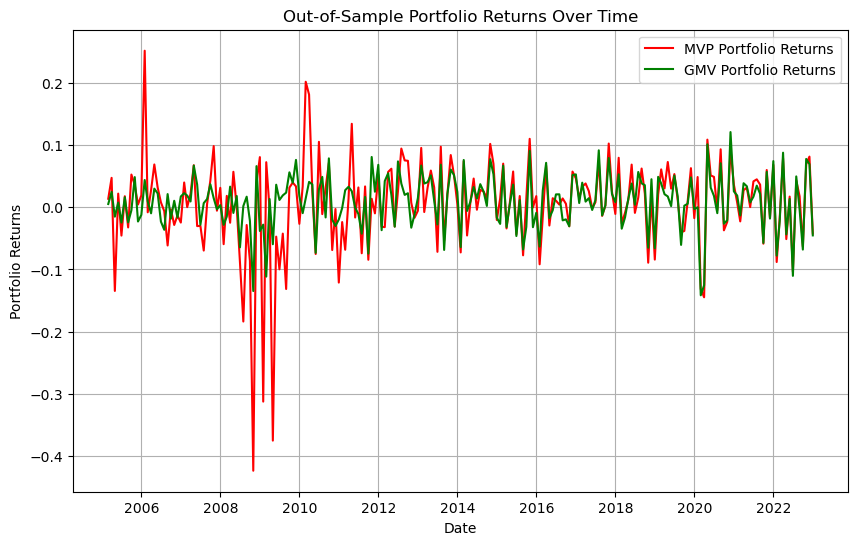

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(results['Dates'], results['MVP Returns'], label='MVP Portfolio Returns', color='red')
plt.plot(results['Dates'], results['GMV Returns'], label='GMV Portfolio Returns', color='green')

plt.title('Out-of-Sample Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.grid(True)
plt.show()

## <span style="color:green">Question 4 of Assignment 4</span>

We compute the Sharp ratio of the out-of-sample returns, knowing that the risk-free rate of return is zero. We annualize the Sharpe Ratio

In [32]:
risk_free_rate = 0

MVP_sharpe_ratio = ((MVP_returns.mean() - risk_free_rate) / MVP_returns.std())
GMV_sharpe_ratio = ((GMV_returns.mean() - risk_free_rate) / GMV_returns.std())

print("The MVP Sharpe Ratio is:", MVP_sharpe_ratio)
print("The GMV Sharpe Ratio is:", GMV_sharpe_ratio)

The MVP Sharpe Ratio is: 0.0738408137744433
The GMV Sharpe Ratio is: 0.20539698470879933


In [33]:
ann_MVP_sharpe_ratio = MVP_sharpe_ratio* np.sqrt(12)
ann_GMV_sharpe_ratio = GMV_sharpe_ratio* np.sqrt(12)

print("The annualized MVP Sharpe Ratio is:", ann_MVP_sharpe_ratio)
print("The annualized GMV Sharpe Ratio is:", ann_GMV_sharpe_ratio)

The annualized MVP Sharpe Ratio is: 0.2557920822591352
The annualized GMV Sharpe Ratio is: 0.7115160264741764


**Interpretation**: The GMV portfolio has a positive and higher Sharpe ratio. This suggests that, on a risk-adjusted basis, the GMV portfolio has performed well during the out-of-sample period.

The results suggest that, based on the Sharpe ratio, the Global Minimum Variance Portfolio (GMV) strategy outperformed the Mean Variance Portfolio (MVP) strategy during the out-of-sample period. So the investors will typically prefer the GMV portfolio (higher Sharpe ratios) as it has a better risk-adjusted returns. However,we have seen in Assignment 3 that the Sharpe ratio is just one measure, and other factors such as the investor's risk tolerance and investment goals should also be considered.

## <span style="color:green">Final step</span>

We are finally asked to save the data we have downloaded for a future use.

In [34]:
file_path = "Monthly_Log_returns_10_companies.csv"
log_return_matrix.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")

Data saved to Monthly_Log_returns_10_companies.csv
